In [93]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib qt


In [45]:
# Import data

df = pd.read_csv('ionosphere.data', header=None)

X = df.copy().iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


## 3.1: Perform PCA on the data and make a scatter plot of PC1 and PC2 (the first two principal compo- nents). Are PC1 and PC2 linearly correlated?

No, after viewing corrplot for the data we can see they are orthogonal (as expected), with correlation between PCs at literally 0 if not for damnable floating point errors.



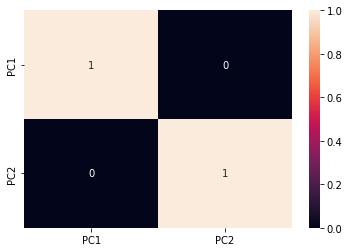

In [89]:
# Q3.1

plt.clf()

pca_2 = PCA(n_components=2)
pca_2.fit(X)

X_new_2 = pca_2.transform(X)
X_new_2

df_pca_2 = pd.DataFrame(X_new_2)
df_pca_2.columns = ['PC1', 'PC2']
corr = round(df_pca_2.corr(), 5)
sns.heatmap(corr, annot=True)
plt.show()

### 3.2: There are three methods to pick a set of principle components: (1) In the plot where the curve bends (elbow technique); (2) Add the percentage variance until total 75% is reached (70 − 90%) (3) Use the components whose variance is at least one. Report the components selected for each technique.

1. Elbow Technique
    * I selected the first 7 PCs using this method, though you could make an argument for more or less than mine. To justify my selection I will include the plot of both actual component variance and cumulative component variance for all PCs.
<br><br>
2. Add variance until total
    * With a threshold of 75%, we need to use the first 10 PCs.
<br><br>
3. Use components with variance >= 1
    * Only the first two PCs have variance greater than 1, so we only use those two.



In [124]:
# Q3.2.1
plt.clf()

pca_all = PCA(n_components=X.shape[1])
pca_all.fit(X)
component_ratios = pca_all.explained_variance_ratio_
components = pca_all.explained_variance_

x = range(1, len(component_ratios) + 1)
vars = component_ratios
cum_vars = component_ratios.cumsum()

fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.lineplot(x = x, y = vars, marker="o", markerfacecolor="red",  ax=ax1)
sns.lineplot(x = x, y = cum_vars, marker="o", markerfacecolor="red", ax=ax2)
ax1.set_title('Component Variance')
ax2.set_title('Cumulative Variance')

plt.show()

In [101]:
# Q3.2.2

total = 0
inc = 0
threshold = 0.75
while total < threshold:
    total += component_ratios[inc]
    inc += 1

print(f"Number of components needed to explain {int(threshold * 100)}% of the variance: {inc + 1}")

Number of components needed to explain 75% of the variance: 10


In [110]:
# Q3.2.3

[round(x, 5) for x in components]

component_list = []
for i, component in enumerate(components):
    if component >= 1:
        component_list.append(component)

print(f"Number of components included with variance greater than 1: {len(component_list)}")
print(component_list)


Number of components included with variance greater than 1: 2
[2.9043615330913974, 1.1370867323857963]


### 3.3: Report and discuss loadings in PCA such as, using prcomp() or princomp() in R. How are principal components and original variables related?

I am using Python instead of R, so I will discuss the sklearn module's decomposition.PCA() function.